# Titanic Survival Prediction using FEDOT and LLM

This notebook demonstrates the process of analyzing the Titanic dataset and predicting passenger survival using the FEDOT framework enhanced with Large Language Models (LLM).

https://www.kaggle.com/competitions/titanic

In [1]:
import sys, os

module_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

if module_path not in sys.path:
    sys.path.insert(0, module_path)

from fedotllm.main import FedotAI
from fedotllm.output import JupyterOutput
from fedotllm.llm import AIInference
from examples.kaggle import download_from_kaggle, submit_to_kaggle

competition_name = "titanic"
dataset_path = os.path.join(os.getcwd(), "competition")
download_from_kaggle(competition_name=competition_name, save_path=dataset_path)

Dataset downloaded and extracted to /Users/aleksejlapin/Work/STABLE-FedotLLM/examples/titanic/competition


In [2]:
from pathlib import Path
description = Path("./overview.txt").read_text()

In [3]:
description

'# Titanic - Machine Learning from Disaster\n\nStart here! Predict survival on the Titanic and get familiar with ML basics\n\n![](https://www.kaggle.com/competitions/3136/images/header)\n\n## Titanic - Machine Learning from Disaster\n\nSubmit Prediction\n\nmore_horiz\n\n[Overview](https://www.kaggle.com/competitions/titanic/overview)[Data](https://www.kaggle.com/competitions/titanic/data)[Code](https://www.kaggle.com/competitions/titanic/code)[Models](https://www.kaggle.com/competitions/titanic/models)[Discussion](https://www.kaggle.com/competitions/titanic/discussion)[Leaderboard](https://www.kaggle.com/competitions/titanic/leaderboard)[Rules](https://www.kaggle.com/competitions/titanic/rules)\n\n## Overview\n\n_all_inclusive_\n\nThis competition runs indefinitely with a rolling leaderboard.\xa0[Learn more.](https://www.kaggle.com/docs/competitions#getting-started)\n\n### Description\n\nlink\n\nkeyboard_arrow_up\n\n## 👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.\n\nThis is 

In [4]:
import shutil
output_path = os.path.join(os.getcwd(), 'output')
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs(output_path, exist_ok=True)

inference = AIInference(model="github/gpt-4o")
    
fedot_ai = FedotAI(
        task_path=dataset_path,
        inference=inference,
        workspace=output_path,
        handlers=JupyterOutput().subscribe
    )
async for _ in fedot_ai.ask(message=description):
    continue

================== HumanMessage ==================

# Titanic - Machine Learning from Disaster

Start here! Predict survival on the Titanic and get familiar with ML basics

![](https://www.kaggle.com/competitions/3136/images/header)

## Titanic - Machine Learning from Disaster

Submit Prediction

more_horiz

[Overview](https://www.kaggle.com/competitions/titanic/overview)[Data](https://www.kaggle.com/competitions/titanic/data)[Code](https://www.kaggle.com/competitions/titanic/code)[Models](https://www.kaggle.com/competitions/titanic/models)[Discussion](https://www.kaggle.com/competitions/titanic/discussion)[Leaderboard](https://www.kaggle.com/competitions/titanic/leaderboard)[Rules](https://www.kaggle.com/competitions/titanic/rules)

## Overview

_all_inclusive_

This competition runs indefinitely with a rolling leaderboard. [Learn more.](https://www.kaggle.com/docs/competitions#getting-started)

### Description

link

keyboard_arrow_up

## 👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

**If you want to talk with other users about this competition, come join our Discord! We've got channels for competitions, job postings and career discussions, resources, and socializing with your fellow data scientists. Follow the link here:** [https://discord.gg/kaggle](https://discord.gg/kaggle)

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the ["Join Competition button](https://www.kaggle.com/account/login?returnUrl=%2Fc%2Ftitanic) to create an account and gain access to the [competition data](https://www.kaggle.com/c/titanic/data). Then check out [Alexis Cook’s Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial) that walks you through step by step how to make your first submission!

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

> #### Recommended Tutorial
> 
> We highly recommend [Alexis Cook’s Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial) that walks you through making your very first submission step by step and [this starter notebook](https://www.kaggle.com/code/gusthema/titanic-competition-w-tensorflow-decision-forests) to get started.

## Overview of How Kaggle’s Competitions Work

1. **Join the Competition**  
    Read about the challenge description, accept the Competition Rules and gain access to the competition dataset.
2. **Get to Work**  
    Download the data, build models on it locally or on Kaggle Notebooks (our no-setup, customizable Jupyter Notebooks environment with free GPUs) and generate a prediction file.
3. **Make a Submission**  
    Upload your prediction as a submission on Kaggle and receive an accuracy score.
4. **Check the Leaderboard**  
    See how your model ranks against other Kagglers on our leaderboard.
5. **Improve Your Score**  
    Check out the [discussion forum](https://www.kaggle.com/c/titanic/discussion) to find lots of tutorials and insights from other competitors.

> #### Kaggle Lingo Video
> 
> You may run into unfamiliar lingo as you dig into the Kaggle discussion forums and public notebooks. Check out Dr. Rachael Tatman’s [video on Kaggle Lingo](https://www.youtube.com/watch?v=sEJHyuWKd-s) to get up to speed!

## What Data Will I Use in This Competition?

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

`Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the `train.csv` data, predict whether the other 418 passengers on board (found in `test.csv`) survived.

Check out the [“Data” tab](https://www.kaggle.com/c/titanic/data) to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

## How to Submit your Prediction to Kaggle

Once you’re ready to make a submission and get on the leaderboard:

1. Click on the “Submit Predictions” button  
    ![](https://storage.googleapis.com/kaggle-media/welcome/screen1.png)
2. Upload a CSV file in the submission file format. You’re able to submit 10 submissions a day.  
    ![](https://storage.googleapis.com/kaggle-media/welcome/screen2.png)

## Submission File Format:

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond `PassengerId` and `Survived`) or rows.

The file should have exactly 2 columns:

- `PassengerId` (sorted in any order)
- `Survived` (contains your binary predictions: 1 for survived, 0 for deceased)

## Got it! I’m ready to get started. Where do I get help if I need it?

- For Competition Help: [Titanic Discussion Forum](https://www.kaggle.com/c/titanic/discussion)
- Technical Help: [Kaggle Contact Us Page](https://www.kaggle.com/contact)

Kaggle doesn’t have a dedicated support team so you’ll typically find that you receive a response more quickly by asking your question in the appropriate forum. The forums are full of useful information on the data, metric, and different approaches. We encourage you to use the forums often. If you share your knowledge, you'll find that others will share a lot in turn!

## A Last Word on Kaggle Notebooks

As we mentioned before, Kaggle Notebooks is our no-setup, customizable, Jupyter Notebooks environment with free GPUs and a huge repository of community published data & code.

In every competition, you’ll find many Notebooks shared with incredible insights. It’s an invaluable resource worth becoming familiar with. Check out this competition’s Notebooks [here](https://www.kaggle.com/c/titanic/notebooks).

## 🏃‍♀Ready to Compete? [Join the Competition Here!](https://www.kaggle.com/account/login?returnUrl=%2Fc%2Ftitanic)

### Evaluation

link

keyboard_arrow_up

## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not.  
For each in the test set, you must predict a 0 or 1 value for the variable.

## Metric

Your score is the percentage of passengers you correctly predict. This is known as [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification).

## Submission File Format

You should submit a csv file with exactly 418 entries **plus** a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.  
  
The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

**PassengerId,Survived**  
892,0  
893,1  
894,0  
Etc.

You can download an example submission file (sample_submission.csv) on the [Data page](https://www.kaggle.com/c/titanic/data).

### Frequently Asked Questions

link

keyboard_arrow_up

## What is a Getting Started competition?

Getting Started competitions were created by Kaggle data scientists for people who have little to no machine learning background. They are a great place to begin if you are new to data science or just finished a MOOC and want to get involved in Kaggle.

Getting Started competitions are a non-competitive way to get familiar with Kaggle’s platform, learn basic machine learning concepts, and start meeting people in the community. They have no cash prize and are on a rolling timeline.

## How do I create and manage a team?

When you accept the competition rules, a team will be created for you. You can invite others to your team, accept a merger with another team, and update basic information like team name by going to the More > [Team](https://www.kaggle.com/c/titanic/team) page.

We've heard from many Kagglers that teaming up is the best way to learn new skills AND have fun. If you don't have a teammate already, consider asking if anyone wants to team up in the [discussion forum](https://www.kaggle.com/c/titanic/discussion).

## What are Notebooks?

Kaggle Notebooks is a cloud computational environment that enables reproducible and collaborative analysis. Notebooks support scripts in Python and R, Jupyter Notebooks, and RMarkdown reports. You can visit the [Notebooks](https://www.kaggle.com/c/titanic/notebooks) tab to view all of the publicly shared code for the Titanic competition. For more on how to use Notebooks to learn data science, check out our [Courses](https://www.kaggle.com/learn/overview)!

## Why did my team disappear from the leaderboard?

To keep with the spirit of getting-started competitions, we have implemented a two month rolling window on submissions. Once a submission is more than two months old, it will be invalidated and no longer count towards the leaderboard.

If your team has no submissions in the previous two months, the team will also drop from the leaderboard. This will keep the leaderboard at a manageable size, freshen it up, and prevent newcomers from getting lost in a sea of abandoned scores.

_"I worked so hard to get that score! Give it back!"_ Read more about our decision to implement a rolling leaderboard [here](https://www.kaggle.com/c/titanic/discussion/6240).

## How do I contact Support?

Kaggle does not have a dedicated support team so you’ll typically find that you receive a response more quickly by asking your question in the appropriate forum. (For this competition, you’ll want to use the [Titanic discussion forum)](https://www.kaggle.com/c/titanic/discussion).

Support is only able to help with issues that are being experienced by all participants. Before contacting support, please check the discussion forum for information on your problem. If you can’t find it, you can post your problem in the forum so a fellow participant or a Kaggle team member can provide help. The forums are full of useful information on the data, metric, and different approaches. We encourage you to use the forums often. If you share your knowledge, you'll find that others will share a lot in turn!

If your problem persists or it seems to be effective all participants then please [contact us](https://www.kaggle.com/contact).

### Citation

link

keyboard_arrow_up

Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic

## Tags

[Binary Classification](https://www.kaggle.com/competitions?tagIds=14201-Binary+Classification)[Tabular](https://www.kaggle.com/competitions?tagIds=14101-Tabular)[Beginner](https://www.kaggle.com/competitions?tagIds=13102-Beginner)[Categorization Accuracy](https://www.kaggle.com/competitions/titanic)

Dataset Description
Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include sample_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

================== AutoMLAgent ===================

## Titanic Survival Prediction: A Beginner's Guide to Machine Learning

The Titanic dataset serves as a well-known starting point for individuals looking to familiarize themselves with machine learning concepts. In this analysis, we aim to predict survival outcomes for passengers based on various features like age, gender, and socio-economic status using machine learning models. This journey will demystify core ML concepts in accessible terms.

### Overview

- **Problem**: Predict survival on the Titanic using passenger details.
- **Goal**: Build a model that predicts which passengers survived the Titanic disaster.
- **Metric**: The model's success is evaluated using accuracy—indicating how well the model predicts true survival outcomes on the test data.

### Data Preprocessing

Data preprocessing transforms raw data into a suitable format for modeling, ensuring accuracy and effectiveness.

- **Feature Selection & Transformation**:
  - Removed irrelevant features such as `PassengerId`, `Name`, `Ticket`, and `Cabin` to simplify the model.
  - Applied **Normalization** to standardize feature ranges, e.g., scaling age values between 0 and 1.
- **Imputation**:
  - Handled missing data using mean imputation for numerical data and most frequent for categorical elements. For example, any absent age entry was replaced with the mean age calculated from non-missing data.

### Pipeline Summary

We're employing a multi-model approach with the following promising algorithms:

- **Logistic Regression**: An efficient baseline for binary classification problems.
- **CatBoost**: Utilized for handling categorical features without much preprocessing.
  - **Parameters**: 3000 trees, learning rate of 0.03, max depth of 5.
- **Scaling**: Essential for optimizing model performance across features of varying scales.
- **XGBoost**: Known for superior performance in structured and tabular datasets.
- **LightGBM**: Offers faster training and higher accuracy with tree-based learning.

| Model    | Parameters                                         | Explanation                                                                 |
|----------|----------------------------------------------------|-----------------------------------------------------------------------------|
| CatBoost | num_trees: 3000, learning_rate: 0.03, max_depth: 5 | CatBoost handles categorical variables effectively, reducing preprocessing. |

### Code Highlights

Here’s a modular glimpse into the structured code implementation:

```python
# Key Snippets for ML Process

from sklearn.impute import SimpleImputer
import pandas as pd

# Loading Data
def load_data():
    train = pd.read_csv(DATASET_PATH / "train.csv")
    X_test = pd.read_csv(DATASET_PATH / "test.csv")
    return train, X_test

# Transforming Data
def transform_data(dataset):
    numeric_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')

    features = dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
    if 'Survived' in dataset.columns:
        target = dataset['Survived']
        features.drop(columns=['Survived'], inplace=True)

    features[numeric_cols] = numeric_imputer.fit_transform(features[numeric_cols])
    features[categorical_cols] = categorical_imputer.fit_transform(features[categorical_cols])
    
    return features.values, target

# Training Model
model = train_model(train_features, train_target)
```

- **Data Preprocessing**: Handles missing values with simple imputations, setting a solid stage for model training.
- **Model Training**: Uses AutoML for model selection and parameter tuning. Efforts focused on achieving high accuracy with minimal tuning complexity.
- **Output**: Creates a compliant CSV file for Kaggle submission, ensuring predictions are tracked against given passenger IDs.

### Metrics

- **Accuracy**: `{'accuracy': 0.788}`
  - It provides a straightforward measure of prediction correctness, showcasing the percentage of passengers accurately classified as survived or deceased by the model.

### Takeaways

This endeavor leverages machine learning to predict Titanic survival outcomes with significant accuracy (78.8%), demonstrating the powerful applicability of ML in historical and critical scenarios. It reinforces the potency of Machine Learning for enhancing decision-making frameworks across data-rich environments, thereby paving the way for more refined predictive tasks.

In [5]:
print("Files in output directory:")
for file in os.listdir(output_path):
    print(f"- {file}")

Files in output directory:
- pipeline
- solution.py
- submission.csv


In [6]:
submit_to_kaggle(competition_name=competition_name, submission_file=os.path.join(output_path, "submission.csv"))

Submitting to 'titanic'...


100%|██████████| 2.77k/2.77k [00:00<00:00, 3.21kB/s]


Current status: SubmissionStatus.PENDING (Description: Reading submission and solution). Waiting for scores...

Submission details:
Date: 2025-05-29 10:34:09.557000
Status: SubmissionStatus.COMPLETE
Public Score: 0.75598
Private Score: 


{"ref": 45155821, "totalBytes": 2839, "date": "2025-05-29T10:34:09.557Z", "description": "FedotLLM_submission_2025-05-29_13-34-07", "errorDescription": "", "fileName": "submission.csv", "publicScore": "0.75598", "privateScore": "", "status": "COMPLETE", "submittedBy": "alekseilapin", "submittedByRef": "alekseilapin", "teamName": "Aleksei Lapin", "url": "/submissions/45155821/45155821.raw"}

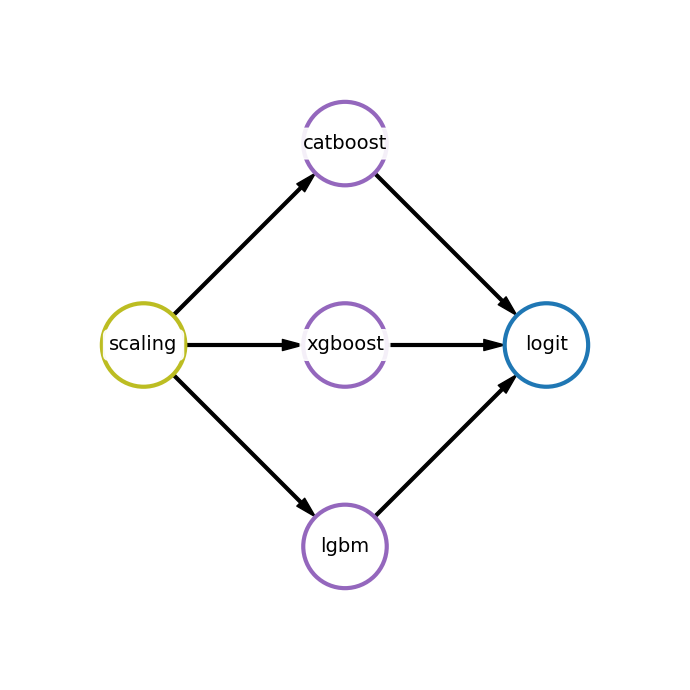

In [7]:
from fedot import Fedot
model = Fedot(problem="classification")
model.load(os.path.join(output_path, 'pipeline'))
model.current_pipeline.show()

In [8]:
from pathlib import Path
import re
solution_path = Path(output_path) / "solution.py"
if not solution_path.exists():
    print("Solution not found!")
else:
    solution_code = solution_path.read_text()
    
    # Find and replace timeout= followed by a number with timeout=60
    # Pattern matches: timeout= followed by optional whitespace, then int/float number
    pattern = r'(timeout\s*=\s*)([0-9]*\.?[0-9]+)'
    replacement = r'\g<1>60'
    
    # Count how many replacements will be made
    matches = re.findall(pattern, solution_code)
    print(f"Found {len(matches)} timeout assignments to replace")
    
    # Show what will be replaced
    for i, match in enumerate(matches, 1):
        print(f"{i}. timeout={match[1]} -> timeout=60")
    
    # Perform the replacement
    updated_code = re.sub(pattern, replacement, solution_code)
    
    # Write back to file
    solution_path.write_text(updated_code)
    print(f"\nUpdated {solution_path}")


Found 1 timeout assignments to replace
1. timeout=1.0 -> timeout=60

Updated /Users/aleksejlapin/Work/STABLE-FedotLLM/examples/titanic/output/solution.py


In [9]:
import subprocess
process = subprocess.Popen([sys.executable, str(solution_path)], 
                          stdout=subprocess.PIPE, 
                          stderr=subprocess.STDOUT,
                          text=True,
                          bufsize=1,
                          universal_newlines=True,
                          cwd=output_path)

# Print output in real-time
for line in process.stdout:
    print(line, end='')

# Wait for process to complete and get return code
return_code = process.wait()
print(f"\nProcess finished with return code: {return_code}")

2025-05-29 13:34:45,112 - ApiComposer - Initial pipeline was fitted in 0.7 sec.
2025-05-29 13:34:45,113 - ApiComposer - Taking into account n_folds=None, estimated fit time for initial assumption is 0.7 sec.
2025-05-29 13:34:45,113 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-05-29 13:34:45,117 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 60 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].
2025-05-29 13:34:45,171 - ApiComposer - Pipeline composition started.

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]2025-05-29 13:34:46,966 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-05-29 13:34:54,699 - MultiprocessingDispatcher - 20 individuals out of 21 in previous pop

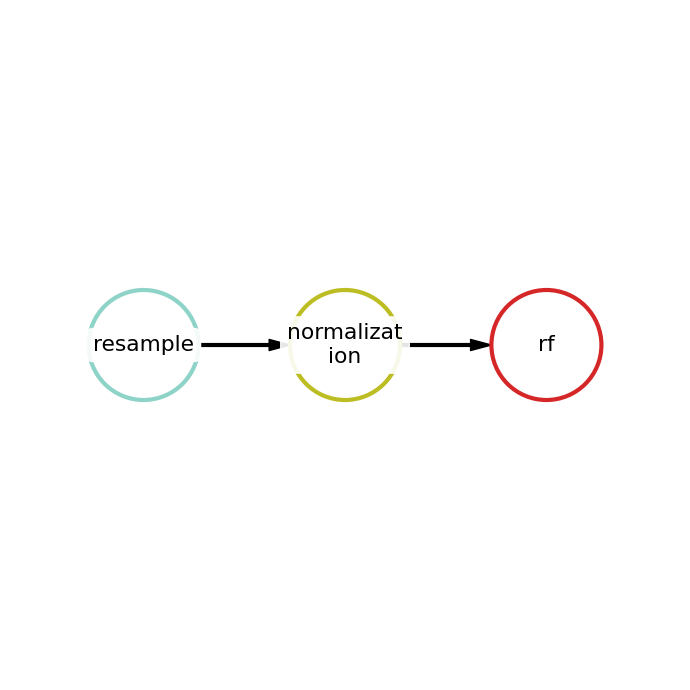

In [10]:
from fedot import Fedot
model = Fedot(problem="classification")
model.load(os.path.join(output_path, 'pipeline'))
model.current_pipeline.show()

In [11]:
submit_to_kaggle(competition_name=competition_name, submission_file=os.path.join(output_path, "submission.csv"))

Submitting to 'titanic'...


100%|██████████| 2.77k/2.77k [00:01<00:00, 2.45kB/s]


Current status: SubmissionStatus.PENDING (Description: Reading submission and solution). Waiting for scores...

Submission details:
Date: 2025-05-29 11:34:48.407000
Status: SubmissionStatus.COMPLETE
Public Score: 0.75598
Private Score: 


{"ref": 45156990, "totalBytes": 2839, "date": "2025-05-29T11:34:48.407Z", "description": "FedotLLM_submission_2025-05-29_14-34-46", "errorDescription": "", "fileName": "submission.csv", "publicScore": "0.75598", "privateScore": "", "status": "COMPLETE", "submittedBy": "alekseilapin", "submittedByRef": "alekseilapin", "teamName": "Aleksei Lapin", "url": "/submissions/45156990/45156990.raw"}